In [59]:
import Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Distributions")
Pkg.add("Polynomials")
print(VERSION)

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...


1.4.1

   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


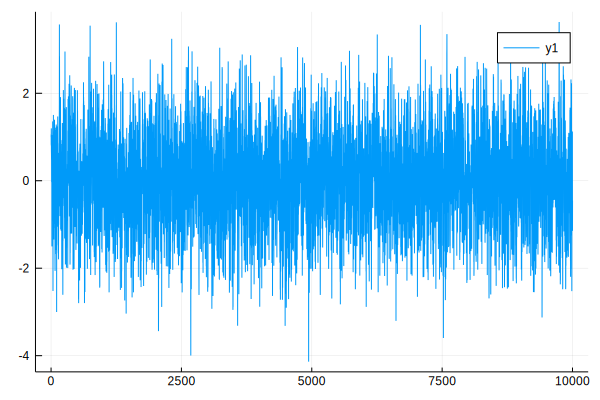

In [378]:
using DifferentialEquations
using Plots

μ = 0.0
σ = sqrt(2)
Θ = 1.0
W = OrnsteinUhlenbeckProcess(Θ,μ,σ,0.0,1.0)
prob = NoiseProblem(W,(0.0,5000.0))
sol = solve(prob;dt=0.5)
plot(sol.u)

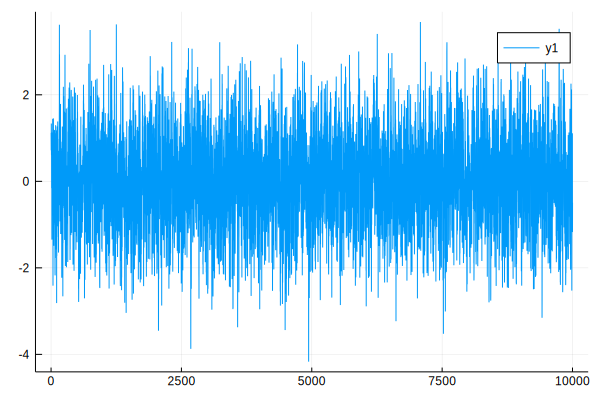

In [379]:
using Distributions, Random
ou_data = sol.u
noise = rand(Normal(0,0.1), length(ou_data))
data = ou_data.+noise
plot(data)

In [299]:
using Polynomials
# function to calculate A and B from the dataset
function OUanalytic(data)
    N = length(data)
    data1sq = data[1]^2
    dataNsq = data[end]^2
    datasq = sum(data[2:end-1].^2)
    datacorr = sum(data[1:end-1].*data[2:end])
    B_coef = Poly([N*datacorr,
       -data1sq-(N+1)*datasq-dataNsq,
       (2.0-N)*datacorr,     
       (N-1)*datasq])
    broots = roots(B_coef)
    println(broots)
    B=broots[end-1]
    Q=(data1sq+dataNsq)/(1-B^2)
    Q=Q+datasq*(1+B^2)/(1-B^2)
    Q=Q-datacorr*2*B/(1-B^2)
    A = Q/N
    P2A = -N/A^2/2
    Btmp = B^2*(1+2*N)
    tmp = (1+Btmp)*(data1sq+dataNsq) + (2*Btmp + N + 1 -B^4*(N-1))*datasq - 2*B*(1+B^2+2*N)*datacorr
    P2B = -tmp/((1-B^2)^2*(data1sq+dataNsq + (1+B^2)*datasq - 2*B*datacorr))
    PAB = (N-1)*B/A/(1-B^2)
    dA = sqrt(-P2B/(P2A*P2B-PAB^2))
    dB = sqrt(-P2A/(P2A*P2B-PAB^2))
    return A,dA,B,dB
end

function OUresult(data,deltat)
    A, dA, B ,dB = OUanalytic(data)
    tau = -deltat/log(B)
    dtau = deltat*dB/B/log(B)^2
    return A,dA,tau,dtau
end

OUresult (generic function with 1 method)

In [63]:
OUanalytic(ou_data)

(0.7463158839472863, 0.09560871774246789, 0.8859807629800794, 0.01458512794609389)

In [316]:
using Polynomials
# function to calculate A and B from the dataset
function OUEM(data1sq,dataNsq,datasq,datacorr,N)
    B_coef = Poly([N*datacorr,
       -data1sq-(N+1)*datasq-dataNsq,
       (2.0-N)*datacorr,     
       (N-1)*datasq])
    broots = roots(B_coef)
    println(broots)
    B=broots[end-1]
    Q=(data1sq+dataNsq)/(1-B^2)
    Q=Q+datasq*(1+B^2)/(1-B^2)
    Q=Q-datacorr*2*B/(1-B^2)
    A = Q/N
    P2A = -N/A^2/2
    Btmp = B^2*(1+2*N)
    tmp = (1+Btmp)*(data1sq+dataNsq) + (2*Btmp + N + 1 -B^4*(N-1))*datasq - 2*B*(1+B^2+2*N)*datacorr
    P2B = -tmp/((1-B^2)^2*(data1sq+dataNsq + (1+B^2)*datasq - 2*B*datacorr))
    PAB = (N-1)*B/A/(1-B^2)
    dA = sqrt(-P2B/(P2A*P2B-PAB^2))
    dB = sqrt(-P2A/(P2A*P2B-PAB^2))
    return A,dA,B,dB
end

function OUEMresult(data1sq,dataNsq,datasq,datacorr,N,deltat)
    A, dA, B ,dB = OUEM(data1sq,dataNsq,datasq,datacorr,N)
    tau = -deltat/log(B)
    dtau = deltat*dB/B/log(B)^2
    return A,dA,tau,dtau
end

OUEMresult (generic function with 1 method)

In [322]:
using Polynomials
# function to calculate A and B from the dataset
function OUEMa(data1sq,dataNsq,datasq,datacorr,N,alpha)
    aep = data1sq+dataNsq
    B_coef = Poly([(aep+datasq)*(alpha-1),
       datacorr*(N-2*(alpha-1)),
       -aep*(N+alpha-1)-datasq*(N+1),     
       datacorr*(N-2*alpha),
       -datasq*(N-2+alpha)])
    broots = roots(B_coef)
    println(broots)
    B=real(broots[end])
    Q=(data1sq+dataNsq)/(1-B^2)
    Q=Q+datasq*(1+B^2)/(1-B^2)
    Q=Q-datacorr*2*B/(1-B^2)
    A = Q/N
    P2A = -N/A^2/2
    Btmp = B^2*(1+2*N)
    tmp = (1+Btmp)*(data1sq+dataNsq) + (2*Btmp + N + 1 -B^4*(N-1))*datasq - 2*B*(1+B^2+2*N)*datacorr
    P2B = -tmp/((1-B^2)^2*(data1sq+dataNsq + (1+B^2)*datasq - 2*B*datacorr))
    PAB = (N-1)*B/A/(1-B^2)
    dA = sqrt(-P2B/(P2A*P2B-PAB^2))
    dB = sqrt(-P2A/(P2A*P2B-PAB^2))
    return A,dA,B,dB
end

function OUEMresulta(data1sq,dataNsq,datasq,datacorr,N,alpha,deltat)
    A, dA, B ,dB = OUEMa(data1sq,dataNsq,datasq,datacorr,alpha,N)
    tau = -deltat/log(B)
    dtau = deltat*dB/B/log(B)^2
    return A,dA,tau,dtau
end

OUEMresulta (generic function with 1 method)

In [257]:
# function to multiply two Gaussians
function mul_gauss(mu1,mu2,sigma1,sigma2)
    mu = (mu1*sigma2^2+mu2*sigma1^2)/(sigma1^2+sigma2^2)
    sigma = sqrt(sigma1^2*sigma2^2/(sigma1^2+sigma2^2))
    return mu,sigma
end

# function to convolute two Gaussians
function con_gauss(mu1,mu2,sigma1,sigma2)
    mu = mu1 + mu2
    sigma = sqrt(sigma1^2+sigma2^2)
    return mu,sigma
end

# function to calculate helper function alpha (forward)
function alpha(y,sigmaN,A,B)
    N = length(y)
    sig_alpha = zeros(N)
    mu_alpha = zeros(N)
    mu_alpha[1],sig_alpha[1] = mul_gauss(0,y[1],sqrt(A),sigmaN)
    for i=2:N
        mu_temp,sig_temp = con_gauss(B*mu_alpha[i-1],0,sqrt(A*(1-B^2)),B*sig_alpha[i-1])
        mu_alpha[i],sig_alpha[i] = mul_gauss(mu_temp,y[i],sig_temp,sigmaN)
    end
    return mu_alpha,sig_alpha
end

function beta(y,sigmaN,A,B)
    N = length(y)
    sig_beta = zeros(N-1)
    mu_beta  = zeros(N-1)
    mu_beta[N-1],sig_beta[N-1] = y[N]/B,sqrt(sigmaN^2+A*(1-B^2))/B
    for i=(N-2):-1:1
        mu_temp,sig_temp = mul_gauss(mu_beta[i+1],y[i+1],sig_beta[i+1],sigmaN)
        mu_beta[i],sig_beta[i] = mu_temp/B,sqrt(sig_temp^2+A*(1-B^2))/B
    end
    return mu_beta,sig_beta
end

function px(y,sigmaN,A,B)
    N = length(y)
    mu_px = zeros(N)
    sig_px = zeros(N)
    exxpone = zeros(N-1)
    rho = zeros(N-1)
    mu_x = zeros(N-1)
    mu_xpone = zeros(N-1)
    mu_alpha,sig_alpha = alpha(y,sigmaN,A,B)
    mu_beta,sig_beta = beta(y,sigmaN,A,B)
    for i=1:N-1
        mu_px[i],sig_px[i] = mul_gauss(mu_alpha[i],mu_beta[i],sig_alpha[i],sig_beta[i])
        if i==N-1
            mu_tmp,sig_tmp = y[N],sigmaN
        else
            mu_tmp,sig_tmp = mul_gauss(mu_beta[i+1],y[i+1],sig_beta[i+1],sigmaN)
        end
        # these are the polynomial coefficients of the distribution
        a = 1.0/(2*sig_tmp)+1.0/(2*(A*(1-B^2)))
        b = 1.0/(2*sig_alpha[i])+B^2/(2*(A*(1-B^2)))
        c = -B/(A*(1-B^2))
        d = -mu_tmp/sig_tmp^2
        e = -mu_alpha[i]/sig_alpha[i]^2
        rho[i] = -c/(2*sqrt(a*b))
        exxpone[i] = -c/(4*a*b-c^2)
        mu_xpone[i] = (2*b*d+c*e)/(4*a*b-c^2)
        mu_x[i] = (2*a*e+d*c)/(4*a*b-c^2)
    end
    # for last one beta = 1
    mu_px[N] = mu_alpha[N]
    sig_px[N] = sig_alpha[N]
    # it seems that the sign of mu_x and mu_xpone are not accuaratly determined by this method
    # we need to correct the signs.  We chose the sign so that mu_x[i] is closest to mu_px[i]
    # and mu_xpone[i] is closeset to mu_px[i+1]
    nswitch=0
    for i=1:N-1
        dx1 = abs(mu_x[i]-mu_px[i])
        dx2 = abs(-mu_x[i]-mu_px[i])
        dxp1 = abs(mu_xpone[i]-mu_px[i+1])
        dxp2 = abs(-mu_xpone[i]-mu_px[i+1])
        if dx1>dx2
            nswitch = nswitch+1
            mu_x[i] = -mu_x[i]
        end
        if dxp1>dxp2
            nswitch = nswitch+1
            mu_xpone[i] = -mu_xpone[i]
        end
    end
    return mu_px,sig_px,rho,exxpone,mu_x,mu_xpone,nswitch
end

function px2(y,sigmaN,A,B)
    N = length(y)
    mu_px = zeros(N)
    sig_px = zeros(N)
    exxpone = zeros(N-1)
    mu_alpha,sig_alpha = alpha(y,sigmaN,A,B)
    mu_beta,sig_beta = beta(y,sigmaN,A,B)
    for i=1:N-1
        mu_px[i],sig_px[i] = mul_gauss(mu_alpha[i],mu_beta[i],sig_alpha[i],sig_beta[i])
        if i==N-1
            mu_tmp,sig_tmp = y[N],sigmaN
        else
            mu_tmp,sig_tmp = mul_gauss(mu_beta[i+1],y[i+1],sig_beta[i+1],sigmaN)
        end
        term1 = A*(1-B^2)
        term2 = term1^2 *mu_tmp*mu_alpha[i]
        term3 = B^2*mu_tmp*mu_alpha[i]*sig_alpha[i]^2
        term4 = B*mu_tmp^2*sig_alpha[i]^2
        term5 = mu_tmp*mu_alpha[i]*sig_tmp^2
        term6 = B*(mu_alpha[i]^2+sig_alpha[i]^2)*sig_tmp^2
        term7 = 2*B*mu_tmp*mu_alpha[i]*sig_alpha[i]^2*sig_tmp^2
        term8 = (mu_alpha[i]^2+sig_alpha[i]^2)*sig_tmp^4
        term9 = B^2*sig_alpha[i]^4*(mu_tmp^2+sig_tmp^2)
        term10 = (B^2*sig_alpha[i]^2+sig_tmp^2-term1)^2
        exxpone[i] = (term2 +term1*(term3+term4+term5+term6)+B*(term7+term8+term9))/term10
        
    end
    # for last one beta = 1
    mu_px[N] = mu_alpha[N]
    sig_px[N] = sig_alpha[N]
    return mu_px,sig_px,exxpone
end

px2 (generic function with 1 method)

In [282]:
sigmaN = 0.001
A=1.0
B=exp(-0.5)
print(B)
mu_px,sig_px,exxpone = px2(data,sigmaN,A,B)

0.6065306597126334

([0.7752342053819834, -0.61095062427559, 0.1977255368217739, 0.8383725364535471, 0.04376633679378767, -0.21962994256837187, -0.7109222003831038, -1.5039409856874855, -1.3188160767171693, -0.021123601114463115  …  0.6922068756793164, 0.703830317304423, -0.5105852762279425, 0.6950200030189551, 0.4499054620809496, 0.6592649876979562, -0.2402109959938698, -0.9003378682005917, 0.7108656077648041, 0.6599809321762188], [0.0009999992090130455, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597  …  0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.00099999891802597, 0.0009999992090130455], [-0.47362982173695417, -0.12080054015552942, 0.1657676598278694, 0.0366924947900475, -0.009612398035488096, 0.15613980204168124, 1.069185034792241, 1.98342

In [383]:
sigmaN = 0.1
A=1.0
B=0.6
N=length(data)
N_iter = 10000
A_list = zeros(N_iter)
B_list = zeros(N_iter)
s_list = zeros(N_iter)
println("sigma^2 data: ",std(data))
println("A: ",A,"  B: ",B,"  SigmaN: ",sigmaN)
A_list[1] = A
B_list[1] = B
s_list[1] = sigmaN
for i=2:N_iter
    mu_px,sig_px,exxpone = px2(data,sigmaN,A,B)
    # lets calculate all the values that we need for OU analysis
    # data1sq,dataNsq,datasq,datacorr
    data1sq = sig_px[1]^2 + mu_px[1]^2
    dataNsq = sig_px[end]^2 + mu_px[end]^2
    datasq = sum(sig_px[2:end-1].^2 .+ mu_px[2:end-1].^2)
    datacorr = sum(exxpone)
#    println(data1sq)
#    println(dataNsq)
#    println(datasq)
#    println(datacorr)
    A,dA,B,dB=OUEM(data1sq,dataNsq,datasq,datacorr,N)
    sigmaN = sqrt((sum(sig_px .^2) + sum(mu_px .^2) + sum(data .^2) -2*sum((mu_px .* data)))/length(data))
#    println("A: ",A,"  B: ",B,"  SigmaN: ",sigmaN)
    A_list[i] = A
    B_list[i] = B
    s_list[i] = sigmaN
end

sigma^2 data: 1.0132892604719117
A: 1.0  B: 0.6  SigmaN: 0.1
[-1.0001000033666578, 0.6073616663754379, 1.0000999983132535]
[-1.0001000033677445, 0.6074685158889128, 1.0000999983154357]
[-1.0001000033677707, 0.6074722175441605, 1.0000999983154626]
[-1.0001000033677723, 0.6074724677161604, 1.000099998315465]
[-1.000100003367773, 0.6074725508002409, 1.000099998315465]
[-1.0001000033677734, 0.6074726252333211, 1.000099998315469]
[-1.0001000033677736, 0.6074726992116549, 1.0000999983154693]
[-1.0001000033677752, 0.6074727731634169, 1.0000999983154713]
[-1.0001000033677752, 0.6074728471110027, 1.0000999983154726]
[-1.0001000033677756, 0.6074729210555835, 1.000099998315476]
[-1.0001000033677774, 0.6074729949972232, 1.000099998315475]
[-1.0001000033677772, 0.6074730689359236, 1.0000999983154775]
[-1.00010000336778, 0.607473142871683, 1.0000999983154795]
[-1.0001000033677796, 0.6074732168045034, 1.000099998315481]
[-1.0001000033677792, 0.6074732907343848, 1.0000999983154828]
[-1.00010000336778,

[-1.0001000033678973, 0.6074844203518786, 1.0000999983157257]
[-1.0001000033678993, 0.6074844938337601, 1.000099998315728]
[-1.000100003367899, 0.6074845673126864, 1.000099998315732]
[-1.0001000033679, 0.6074846407886583, 1.0000999983157322]
[-1.0001000033679004, 0.6074847142616742, 1.000099998315735]
[-1.0001000033679022, 0.6074847877317353, 1.0000999983157368]
[-1.0001000033679022, 0.6074848611988418, 1.0000999983157375]
[-1.0001000033679024, 0.6074849346629929, 1.0000999983157386]
[-1.0001000033679044, 0.6074850081241873, 1.0000999983157404]
[-1.0001000033679046, 0.607485081582426, 1.0000999983157415]
[-1.0001000033679075, 0.6074851550377097, 1.0000999983157453]
[-1.000100003367907, 0.6074852284900374, 1.0000999983157453]
[-1.000100003367908, 0.6074853019394091, 1.0000999983157466]
[-1.0001000033679093, 0.607485375385825, 1.0000999983157488]
[-1.000100003367908, 0.6074854488292838, 1.0000999983157481]
[-1.0001000033679097, 0.6074855222697865, 1.0000999983157517]
[-1.0001000033679095

[-1.0001000033680287, 0.6074968697449311, 1.000099998316001]
[-1.0001000033680305, 0.6074969427230701, 1.0000999983160026]
[-1.0001000033680307, 0.6074970156982371, 1.0000999983160042]
[-1.0001000033680316, 0.6074970886704323, 1.0000999983160075]
[-1.0001000033680314, 0.6074971616396567, 1.0000999983160086]
[-1.0001000033680332, 0.6074972346059098, 1.0000999983160108]
[-1.0001000033680332, 0.6074973075691911, 1.00009999831601]
[-1.0001000033680332, 0.6074973805294993, 1.0000999983160126]
[-1.000100003368035, 0.6074974534868363, 1.0000999983160141]
[-1.000100003368037, 0.6074975264412011, 1.0000999983160164]
[-1.0001000033680372, 0.6074975993925947, 1.0000999983160175]
[-1.0001000033680367, 0.6074976723410161, 1.000099998316017]
[-1.0001000033680385, 0.6074977452864642, 1.0000999983160224]
[-1.0001000033680398, 0.6074978182289402, 1.0000999983160213]
[-1.0001000033680396, 0.607497891168444, 1.000099998316024]
[-1.0001000033680412, 0.6074979641049741, 1.000099998316025]
[-1.0001000033680

[-1.0001000033681617, 0.6075094506760035, 1.000099998316278]
[-1.0001000033681615, 0.6075095231387166, 1.0000999983162786]
[-1.0001000033681628, 0.6075095955984423, 1.0000999983162822]
[-1.0001000033681646, 0.6075096680551816, 1.000099998316283]
[-1.0001000033681655, 0.6075097405089318, 1.000099998316285]
[-1.0001000033681646, 0.6075098129596963, 1.0000999983162862]
[-1.000100003368166, 0.6075098854074714, 1.0000999983162882]
[-1.0001000033681666, 0.60750995785226, 1.0000999983162893]
[-1.000100003368168, 0.6075100302940608, 1.0000999983162906]
[-1.0001000033681695, 0.6075101027328733, 1.0000999983162926]
[-1.0001000033681695, 0.6075101751686973, 1.0000999983162941]
[-1.00010000336817, 0.6075102476015343, 1.0000999983162973]
[-1.0001000033681704, 0.607510320031383, 1.000099998316296]
[-1.000100003368172, 0.6075103924582429, 1.0000999983162993]
[-1.0001000033681726, 0.6075104648821148, 1.0000999983163001]
[-1.0001000033681722, 0.6075105373029984, 1.000099998316301]
[-1.0001000033681744,

[-1.0001000033682934, 0.6075218702580225, 1.000099998316552]
[-1.0001000033682939, 0.6075219422056277, 1.0000999983165528]
[-1.0001000033682943, 0.6075220141502303, 1.0000999983165548]
[-1.0001000033682947, 0.6075220860918301, 1.0000999983165553]
[-1.0001000033682952, 0.6075221580304275, 1.0000999983165586]
[-1.0001000033682972, 0.6075222299660217, 1.0000999983165608]
[-1.0001000033682974, 0.6075223018986153, 1.0000999983165608]
[-1.0001000033682987, 0.6075223738282043, 1.0000999983165622]
[-1.0001000033682987, 0.6075224457547906, 1.0000999983165642]
[-1.0001000033682992, 0.6075225176783738, 1.0000999983165666]
[-1.0001000033683, 0.6075225895989551, 1.0000999983165675]
[-1.0001000033683, 0.6075226615165327, 1.0000999983165693]
[-1.0001000033683023, 0.6075227334311071, 1.0000999983165701]
[-1.0001000033683014, 0.6075228053426782, 1.000099998316572]
[-1.0001000033683027, 0.6075228772512468, 1.0000999983165728]
[-1.000100003368305, 0.6075229491568106, 1.0000999983165761]
[-1.0001000033683

[-1.0001000033684262, 0.6075344153045402, 1.000099998316828]
[-1.000100003368427, 0.6075344867254613, 1.0000999983168297]
[-1.0001000033684257, 0.607534558143367, 1.0000999983168304]
[-1.0001000033684275, 0.6075346295582538, 1.0000999983168322]
[-1.0001000033684284, 0.6075347009701249, 1.0000999983168357]
[-1.0001000033684284, 0.6075347723789787, 1.0000999983168366]
[-1.0001000033684302, 0.6075348437848154, 1.0000999983168375]
[-1.000100003368432, 0.6075349151876348, 1.00009999831684]
[-1.0001000033684315, 0.6075349865874369, 1.0000999983168395]
[-1.000100003368432, 0.6075350579842216, 1.0000999983168428]
[-1.000100003368432, 0.6075351293779891, 1.000099998316844]
[-1.0001000033684324, 0.6075352007687389, 1.000099998316844]
[-1.0001000033684337, 0.60753527215647, 1.0000999983168477]
[-1.0001000033684353, 0.6075353435411843, 1.0000999983168473]
[-1.0001000033684353, 0.6075354149228799, 1.00009999831685]
[-1.000100003368436, 0.6075354863015586, 1.00009999831685]
[-1.0001000033684364, 0.6

[-1.000100003368555, 0.6075466552706177, 1.0000999983170975]
[-1.0001000033685545, 0.6075467261714715, 1.0000999983170986]
[-1.0001000033685559, 0.6075467970692952, 1.0000999983171]
[-1.0001000033685572, 0.6075468679640881, 1.0000999983171022]
[-1.0001000033685576, 0.6075469388558502, 1.0000999983171048]
[-1.000100003368559, 0.6075470097445815, 1.0000999983171048]
[-1.0001000033685583, 0.6075470806302825, 1.0000999983171073]
[-1.000100003368559, 0.6075471515129541, 1.0000999983171062]
[-1.0001000033685599, 0.6075472223925926, 1.0000999983171108]
[-1.0001000033685616, 0.6075472932692013, 1.0000999983171124]
[-1.000100003368563, 0.607547364142779, 1.0000999983171135]
[-1.0001000033685614, 0.6075474350133255, 1.000099998317114]
[-1.0001000033685636, 0.6075475058808407, 1.0000999983171164]
[-1.0001000033685634, 0.6075475767453243, 1.0000999983171186]
[-1.0001000033685654, 0.6075476476067768, 1.0000999983171197]
[-1.0001000033685652, 0.6075477184651985, 1.0000999983171217]
[-1.0001000033685

[-1.0001000033686864, 0.6075591574519029, 1.0000999983173724]
[-1.0001000033686864, 0.60755922781521, 1.0000999983173735]
[-1.0001000033686884, 0.6075592981754735, 1.0000999983173755]
[-1.0001000033686887, 0.6075593685326935, 1.0000999983173764]
[-1.0001000033686878, 0.6075594388868698, 1.0000999983173788]
[-1.0001000033686909, 0.6075595092380023, 1.0000999983173808]
[-1.0001000033686909, 0.607559579586091, 1.0000999983173824]
[-1.0001000033686913, 0.6075596499311359, 1.0000999983173824]
[-1.0001000033686922, 0.6075597202731362, 1.000099998317384]
[-1.0001000033686922, 0.6075597906120933, 1.0000999983173844]
[-1.000100003368694, 0.6075598609480054, 1.0000999983173888]
[-1.0001000033686953, 0.6075599312808737, 1.0000999983173904]
[-1.0001000033686944, 0.6075600016106979, 1.0000999983173915]
[-1.0001000033686944, 0.6075600719374776, 1.0000999983173933]
[-1.000100003368696, 0.607560142261213, 1.0000999983173933]
[-1.0001000033686969, 0.6075602125819042, 1.0000999983173957]
[-1.00010000336

[-1.0001000033688126, 0.6075712151235593, 1.0000999983176364]
[-1.0001000033688139, 0.6075712849623427, 1.000099998317639]
[-1.000100003368816, 0.6075713547980703, 1.0000999983176395]
[-1.0001000033688157, 0.6075714246307431, 1.0000999983176437]
[-1.0001000033688159, 0.6075714944603607, 1.0000999983176444]
[-1.000100003368816, 0.6075715642869223, 1.0000999983176444]
[-1.000100003368818, 0.607571634110428, 1.0000999983176468]
[-1.0001000033688192, 0.6075717039308767, 1.00009999831765]
[-1.0001000033688194, 0.6075717737482714, 1.0000999983176502]
[-1.00010000336882, 0.607571843562609, 1.0000999983176517]
[-1.00010000336882, 0.6075719133738908, 1.0000999983176533]
[-1.0001000033688214, 0.6075719831821174, 1.0000999983176535]
[-1.0001000033688212, 0.6075720529872859, 1.0000999983176564]
[-1.0001000033688228, 0.6075721227893991, 1.0000999983176586]
[-1.0001000033688245, 0.6075721925884565, 1.0000999983176588]
[-1.0001000033688254, 0.6075722623844569, 1.0000999983176622]
[-1.000100003368826,

[-1.0001000033689373, 0.6075829744492482, 1.0000999983178969]
[-1.0001000033689391, 0.6075830437707102, 1.0000999983178982]
[-1.0001000033689391, 0.6075831130891047, 1.0000999983178989]
[-1.0001000033689387, 0.6075831824044328, 1.0000999983179013]
[-1.00010000336894, 0.6075832517166933, 1.000099998317903]
[-1.0001000033689422, 0.6075833210258867, 1.0000999983179062]
[-1.0001000033689422, 0.607583390332015, 1.0000999983179053]
[-1.0001000033689418, 0.607583459635075, 1.0000999983179075]
[-1.0001000033689431, 0.6075835289350694, 1.0000999983179093]
[-1.000100003368944, 0.6075835982319959, 1.0000999983179109]
[-1.000100003368944, 0.6075836675258547, 1.0000999983179124]
[-1.000100003368946, 0.6075837368166478, 1.0000999983179122]
[-1.0001000033689453, 0.6075838061043731, 1.0000999983179149]
[-1.0001000033689462, 0.6075838753890318, 1.000099998317916]
[-1.000100003368948, 0.6075839446706217, 1.0000999983179188]
[-1.000100003368947, 0.6075840139491442, 1.000099998317921]
[-1.0001000033689482

[-1.000100003369064, 0.6075950589616035, 1.0000999983181633]
[-1.0001000033690657, 0.6075951277454721, 1.0000999983181647]
[-1.0001000033690661, 0.6075951965262625, 1.0000999983181653]
[-1.0001000033690666, 0.6075952653039751, 1.0000999983181684]
[-1.000100003369068, 0.6075953340786102, 1.0000999983181704]
[-1.0001000033690683, 0.6075954028501689, 1.0000999983181702]
[-1.0001000033690697, 0.6075954716186498, 1.0000999983181715]
[-1.0001000033690692, 0.6075955403840533, 1.0000999983181738]
[-1.0001000033690706, 0.6075956091463789, 1.0000999983181749]
[-1.0001000033690706, 0.6075956779056261, 1.0000999983181764]
[-1.0001000033690715, 0.6075957466617965, 1.0000999983181789]
[-1.0001000033690732, 0.6075958154148883, 1.0000999983181804]
[-1.0001000033690741, 0.6075958841649036, 1.0000999983181809]
[-1.000100003369075, 0.6075959529118403, 1.0000999983181835]
[-1.000100003369076, 0.6075960216556989, 1.0000999983181837]
[-1.000100003369075, 0.607596090396479, 1.000099998318185]
[-1.00010000336

[-1.0001000033691922, 0.6076071174807097, 1.0000999983184284]
[-1.0001000033691922, 0.6076071857220935, 1.0000999983184302]
[-1.0001000033691936, 0.60760725396039, 1.0000999983184313]
[-1.000100003369193, 0.6076073221955992, 1.0000999983184322]
[-1.000100003369195, 0.6076073904277202, 1.0000999983184358]
[-1.000100003369197, 0.6076074586567549, 1.0000999983184358]
[-1.0001000033691967, 0.6076075268827019, 1.0000999983184378]
[-1.0001000033691976, 0.6076075951055611, 1.0000999983184404]
[-1.0001000033691962, 0.607607663325333, 1.0000999983184398]
[-1.0001000033691971, 0.6076077315420169, 1.0000999983184422]
[-1.0001000033691985, 0.6076077997556134, 1.0000999983184438]
[-1.0001000033691994, 0.6076078679661218, 1.0000999983184466]
[-1.0001000033692002, 0.6076079361735428, 1.000099998318446]
[-1.0001000033692011, 0.6076080043778751, 1.0000999983184506]
[-1.000100003369201, 0.6076080725791208, 1.0000999983184506]
[-1.000100003369202, 0.6076081407772785, 1.000099998318451]
[-1.00010000336920

[-1.0001000033693155, 0.6076188095531526, 1.0000999983186847]
[-1.0001000033693166, 0.6076188772627491, 1.0000999983186887]
[-1.0001000033693161, 0.6076189449692511, 1.000099998318689]
[-1.0001000033693186, 0.6076190126726555, 1.0000999983186902]
[-1.0001000033693175, 0.6076190803729634, 1.0000999983186927]
[-1.0001000033693184, 0.6076191480701754, 1.0000999983186931]
[-1.0001000033693197, 0.6076192157642916, 1.000099998318697]
[-1.0001000033693195, 0.6076192834553118, 1.0000999983186956]
[-1.0001000033693224, 0.6076193511432336, 1.0000999983186987]
[-1.0001000033693221, 0.6076194188280598, 1.0000999983187]
[-1.0001000033693224, 0.6076194865097885, 1.0000999983187018]
[-1.0001000033693235, 0.6076195541884217, 1.0000999983187018]
[-1.0001000033693228, 0.6076196218639581, 1.000099998318704]
[-1.0001000033693241, 0.6076196895363967, 1.0000999983187053]
[-1.000100003369326, 0.6076197572057396, 1.0000999983187064]
[-1.0001000033693273, 0.6076198248719845, 1.0000999983187098]
[-1.00010000336

[-1.0001000033694392, 0.6076305443792172, 1.0000999983189438]
[-1.0001000033694414, 0.6076306115493343, 1.0000999983189456]
[-1.0001000033694396, 0.607630678716348, 1.0000999983189465]
[-1.0001000033694405, 0.6076307458802563, 1.0000999983189496]
[-1.0001000033694418, 0.6076308130410611, 1.0000999983189498]
[-1.0001000033694436, 0.6076308801987595, 1.0000999983189522]
[-1.0001000033694432, 0.607630947353355, 1.0000999983189547]
[-1.000100003369444, 0.6076310145048446, 1.000099998318955]
[-1.0001000033694458, 0.6076310816532304, 1.0000999983189556]
[-1.0001000033694456, 0.6076311487985103, 1.0000999983189574]
[-1.0001000033694465, 0.607631215940686, 1.0000999983189587]
[-1.0001000033694465, 0.6076312830797554, 1.0000999983189613]
[-1.0001000033694467, 0.6076313502157207, 1.000099998318962]
[-1.0001000033694485, 0.6076314173485813, 1.0000999983189642]
[-1.0001000033694492, 0.6076314844783358, 1.0000999983189647]
[-1.0001000033694498, 0.6076315516049856, 1.0000999983189667]
[-1.0001000033

[-1.0001000033695648, 0.6076423850923599, 1.000099998319204]
[-1.0001000033695646, 0.6076424517122739, 1.000099998319207]
[-1.0001000033695662, 0.6076425183290761, 1.0000999983192094]
[-1.0001000033695666, 0.6076425849427657, 1.0000999983192094]
[-1.0001000033695666, 0.6076426515533425, 1.0000999983192116]
[-1.0001000033695673, 0.6076427181608075, 1.000099998319212]
[-1.0001000033695675, 0.6076427847651602, 1.0000999983192145]
[-1.0001000033695695, 0.6076428513663998, 1.0000999983192158]
[-1.0001000033695693, 0.6076429179645271, 1.0000999983192174]
[-1.00010000336957, 0.6076429845595421, 1.0000999983192185]
[-1.0001000033695717, 0.6076430511514441, 1.0000999983192203]
[-1.0001000033695724, 0.6076431177402337, 1.0000999983192205]
[-1.0001000033695728, 0.6076431843259104, 1.0000999983192218]
[-1.000100003369573, 0.6076432509084734, 1.0000999983192242]
[-1.0001000033695728, 0.6076433174879244, 1.0000999983192267]
[-1.000100003369575, 0.6076433840642627, 1.000099998319227]
[-1.000100003369

[-1.000100003369686, 0.6076539961569323, 1.0000999983194623]
[-1.0001000033696863, 0.6076540622315822, 1.000099998319462]
[-1.000100003369688, 0.6076541283031132, 1.0000999983194625]
[-1.0001000033696892, 0.6076541943715246, 1.0000999983194658]
[-1.0001000033696896, 0.6076542604368176, 1.0000999983194665]
[-1.000100003369691, 0.6076543264989899, 1.0000999983194678]
[-1.0001000033696916, 0.6076543925580444, 1.000099998319469]
[-1.0001000033696905, 0.6076544586139783, 1.000099998319471]
[-1.000100003369692, 0.6076545246667931, 1.0000999983194723]
[-1.0001000033696923, 0.6076545907164892, 1.0000999983194734]
[-1.000100003369694, 0.6076546567630652, 1.0000999983194758]
[-1.0001000033696936, 0.6076547228065211, 1.000099998319477]
[-1.0001000033696945, 0.6076547888468583, 1.0000999983194787]
[-1.0001000033696963, 0.6076548548840752, 1.0000999983194827]
[-1.0001000033696963, 0.6076549209181729, 1.000099998319481]
[-1.0001000033696974, 0.6076549869491511, 1.000099998319482]
[-1.000100003369697

[-1.0001000033698082, 0.6076656427527, 1.0000999983197163]
[-1.0001000033698106, 0.6076657082746963, 1.0000999983197185]
[-1.00010000336981, 0.6076657737935681, 1.0000999983197199]
[-1.0001000033698126, 0.6076658393093137, 1.0000999983197234]
[-1.0001000033698124, 0.6076659048219356, 1.0000999983197238]
[-1.0001000033698126, 0.6076659703314303, 1.0000999983197247]
[-1.0001000033698144, 0.6076660358378001, 1.0000999983197263]
[-1.0001000033698135, 0.6076661013410439, 1.0000999983197283]
[-1.0001000033698157, 0.6076661668411627, 1.0000999983197307]
[-1.0001000033698144, 0.6076662323381553, 1.0000999983197325]
[-1.000100003369817, 0.6076662978320234, 1.0000999983197327]
[-1.0001000033698162, 0.6076663633227656, 1.000099998319733]
[-1.000100003369817, 0.6076664288103816, 1.0000999983197343]
[-1.0001000033698189, 0.6076664942948721, 1.0000999983197354]
[-1.0001000033698189, 0.6076665597762362, 1.000099998319739]
[-1.0001000033698197, 0.6076666252544739, 1.0000999983197405]
[-1.0001000033698

[-1.0001000033699277, 0.607676931531768, 1.0000999983199659]
[-1.0001000033699299, 0.607676996512606, 1.0000999983199679]
[-1.0001000033699308, 0.6076770614903125, 1.0000999983199688]
[-1.0001000033699299, 0.6076771264648899, 1.0000999983199703]
[-1.000100003369931, 0.6076771914363346, 1.0000999983199719]
[-1.0001000033699308, 0.60767725640465, 1.0000999983199736]
[-1.0001000033699334, 0.6076773213698342, 1.0000999983199752]
[-1.0001000033699334, 0.607677386331888, 1.0000999983199743]
[-1.0001000033699345, 0.6076774512908095, 1.0000999983199783]
[-1.0001000033699352, 0.6076775162466009, 1.0000999983199794]
[-1.0001000033699357, 0.6076775811992616, 1.0000999983199823]
[-1.0001000033699359, 0.607677646148792, 1.0000999983199805]
[-1.0001000033699374, 0.60767771109519, 1.000099998319983]
[-1.0001000033699379, 0.6076777760384577, 1.0000999983199852]
[-1.0001000033699383, 0.6076778409785947, 1.0000999983199863]
[-1.0001000033699396, 0.6076779059156003, 1.0000999983199894]
[-1.00010000336993

[-1.0001000033700462, 0.6076881266147444, 1.0000999983202132]
[-1.0001000033700467, 0.6076881910535649, 1.0000999983202146]
[-1.0001000033700476, 0.607688255489251, 1.0000999983202163]
[-1.000100003370049, 0.6076883199218014, 1.0000999983202163]
[-1.0001000033700487, 0.6076883843512165, 1.0000999983202188]
[-1.000100003370049, 0.6076884487774965, 1.0000999983202203]
[-1.0001000033700498, 0.6076885132006409, 1.000099998320222]
[-1.0001000033700504, 0.6076885776206499, 1.0000999983202237]
[-1.0001000033700513, 0.6076886420375228, 1.0000999983202228]
[-1.0001000033700524, 0.6076887064512616, 1.000099998320225]
[-1.0001000033700522, 0.6076887708618629, 1.0000999983202286]
[-1.000100003370054, 0.607688835269331, 1.0000999983202274]
[-1.0001000033700538, 0.6076888996736617, 1.0000999983202303]
[-1.0001000033700553, 0.6076889640748572, 1.0000999983202328]
[-1.000100003370056, 0.6076890284729181, 1.000099998320232]
[-1.0001000033700564, 0.6076890928678422, 1.0000999983202343]
[-1.0001000033700

[-1.0001000033701624, 0.6076992278639306, 1.0000999983204573]
[-1.0001000033701644, 0.6076992917600018, 1.0000999983204586]
[-1.0001000033701661, 0.6076993556529329, 1.0000999983204617]
[-1.0001000033701657, 0.6076994195427261, 1.000099998320462]
[-1.0001000033701675, 0.6076994834293782, 1.0000999983204628]
[-1.0001000033701675, 0.6076995473128922, 1.000099998320465]
[-1.000100003370168, 0.6076996111932673, 1.0000999983204648]
[-1.0001000033701672, 0.6076996750705024, 1.0000999983204675]
[-1.000100003370169, 0.6076997389445976, 1.0000999983204695]
[-1.0001000033701697, 0.6076998028155548, 1.0000999983204688]
[-1.0001000033701708, 0.6076998666833716, 1.000099998320471]
[-1.000100003370171, 0.6076999305480495, 1.0000999983204721]
[-1.0001000033701715, 0.6076999944095877, 1.0000999983204744]
[-1.0001000033701717, 0.6077000582679873, 1.0000999983204744]
[-1.0001000033701737, 0.6077001221232468, 1.0000999983204784]
[-1.000100003370173, 0.6077001859753665, 1.0000999983204795]
[-1.00010000337

[-1.0001000033702803, 0.60771042521173, 1.0000999983207044]
[-1.000100003370283, 0.6077104885550124, 1.0000999983207068]
[-1.000100003370283, 0.6077105518951526, 1.0000999983207077]
[-1.000100003370282, 0.6077106152321495, 1.0000999983207082]
[-1.000100003370283, 0.6077106785660054, 1.0000999983207086]
[-1.0001000033702856, 0.6077107418967176, 1.000099998320712]
[-1.0001000033702856, 0.6077108052242886, 1.000099998320714]
[-1.000100003370286, 0.6077108685487164, 1.0000999983207153]
[-1.0001000033702863, 0.6077109318700014, 1.0000999983207175]
[-1.0001000033702858, 0.6077109951881449, 1.0000999983207164]
[-1.0001000033702891, 0.6077110585031454, 1.000099998320718]
[-1.0001000033702896, 0.6077111218150029, 1.0000999983207197]
[-1.000100003370289, 0.6077111851237176, 1.000099998320721]
[-1.0001000033702905, 0.6077112484292913, 1.0000999983207228]
[-1.000100003370291, 0.6077113117317215, 1.0000999983207228]
[-1.0001000033702911, 0.6077113750310085, 1.0000999983207255]
[-1.0001000033702914,

[-1.0001000033703993, 0.6077215252229159, 1.000099998320948]
[-1.0001000033703984, 0.6077215880129061, 1.0000999983209515]
[-1.0001000033704002, 0.6077216507997527, 1.0000999983209535]
[-1.0001000033704015, 0.6077217135834546, 1.0000999983209526]
[-1.000100003370402, 0.6077217763640113, 1.000099998320955]
[-1.000100003370402, 0.6077218391414231, 1.0000999983209558]
[-1.0001000033704028, 0.6077219019156895, 1.0000999983209575]
[-1.0001000033704024, 0.607721964686811, 1.0000999983209582]
[-1.0001000033704046, 0.6077220274547873, 1.000099998320962]
[-1.000100003370405, 0.6077220902196192, 1.0000999983209615]
[-1.0001000033704046, 0.6077221529813063, 1.0000999983209609]
[-1.0001000033704055, 0.6077222157398479, 1.0000999983209633]
[-1.000100003370406, 0.6077222784952442, 1.0000999983209653]
[-1.0001000033704073, 0.6077223412474957, 1.0000999983209655]
[-1.0001000033704082, 0.6077224039966025, 1.0000999983209686]
[-1.0001000033704093, 0.607722466742564, 1.0000999983209704]
[-1.0001000033704

[-1.0001000033705147, 0.607732403337945, 1.0000999983211887]
[-1.0001000033705147, 0.6077324655805615, 1.000099998321191]
[-1.0001000033705147, 0.6077325278200322, 1.0000999983211911]
[-1.0001000033705152, 0.6077325900563558, 1.0000999983211936]
[-1.0001000033705176, 0.6077326522895325, 1.0000999983211953]
[-1.0001000033705172, 0.6077327145195617, 1.0000999983211971]
[-1.000100003370517, 0.6077327767464461, 1.000099998321197]
[-1.0001000033705174, 0.6077328389701815, 1.0000999983211993]
[-1.0001000033705192, 0.607732901190773, 1.0000999983211982]
[-1.0001000033705196, 0.6077329634082159, 1.000099998321201]
[-1.0001000033705196, 0.6077330256225123, 1.000099998321203]
[-1.00010000337052, 0.6077330878336622, 1.0000999983212047]
[-1.0001000033705216, 0.607733150041666, 1.0000999983212047]
[-1.0001000033705216, 0.6077332122465218, 1.0000999983212062]
[-1.0001000033705227, 0.6077332744482312, 1.000099998321209]
[-1.0001000033705238, 0.6077333366467937, 1.00009999832121]
[-1.0001000033705236,

[-1.0001000033706249, 0.6077429393753092, 1.0000999983214205]
[-1.0001000033706249, 0.6077430010828968, 1.000099998321423]
[-1.000100003370625, 0.6077430627873357, 1.0000999983214245]
[-1.0001000033706275, 0.6077431244886271, 1.0000999983214263]
[-1.0001000033706262, 0.6077431861867709, 1.0000999983214278]
[-1.0001000033706275, 0.6077432478817671, 1.0000999983214294]
[-1.0001000033706284, 0.6077433095736156, 1.0000999983214292]
[-1.0001000033706289, 0.6077433712623158, 1.0000999983214305]
[-1.0001000033706295, 0.6077434329478688, 1.0000999983214327]
[-1.0001000033706307, 0.607743494630274, 1.0000999983214338]
[-1.000100003370631, 0.6077435563095319, 1.000099998321434]
[-1.000100003370632, 0.6077436179856409, 1.0000999983214356]
[-1.0001000033706315, 0.6077436796586028, 1.0000999983214376]
[-1.0001000033706333, 0.6077437413284168, 1.000099998321439]
[-1.0001000033706342, 0.6077438029950829, 1.0000999983214403]
[-1.0001000033706338, 0.6077438646586022, 1.0000999983214407]
[-1.00010000337

[-1.0001000033707368, 0.6077535679534667, 1.0000999983216547]
[-1.0001000033707363, 0.6077536291164558, 1.0000999983216576]
[-1.0001000033707372, 0.6077536902762979, 1.0000999983216567]
[-1.0001000033707386, 0.6077537514329909, 1.0000999983216587]
[-1.000100003370739, 0.607753812586536, 1.000099998321661]
[-1.0001000033707397, 0.6077538737369329, 1.0000999983216612]
[-1.0001000033707403, 0.6077539348841821, 1.0000999983216634]
[-1.0001000033707415, 0.6077539960282834, 1.000099998321664]
[-1.000100003370742, 0.6077540571692359, 1.0000999983216654]
[-1.000100003370743, 0.6077541183070407, 1.0000999983216676]
[-1.0001000033707437, 0.607754179441697, 1.0000999983216698]
[-1.0001000033707437, 0.6077542405732052, 1.00009999832167]
[-1.0001000033707457, 0.6077543017015663, 1.000099998321672]
[-1.0001000033707457, 0.6077543628267783, 1.0000999983216736]
[-1.0001000033707474, 0.6077544239488427, 1.0000999983216752]
[-1.0001000033707461, 0.6077544850677585, 1.0000999983216758]
[-1.00010000337074

[-1.0001000033708476, 0.6077640416921535, 1.0000999983218855]
[-1.0001000033708471, 0.6077641023136828, 1.0000999983218877]
[-1.0001000033708483, 0.607764162932065, 1.0000999983218888]
[-1.0001000033708491, 0.6077642235472976, 1.0000999983218906]
[-1.0001000033708496, 0.6077642841593842, 1.00009999832189]
[-1.00010000337085, 0.607764344768321, 1.000099998321893]
[-1.000100003370851, 0.6077644053741116, 1.0000999983218943]
[-1.0001000033708505, 0.6077644659767532, 1.000099998321896]
[-1.0001000033708511, 0.6077645265762481, 1.0000999983218966]
[-1.0001000033708527, 0.6077645871725955, 1.0000999983218963]
[-1.0001000033708534, 0.607764647765794, 1.0000999983218994]
[-1.0001000033708545, 0.6077647083558446, 1.0000999983219006]
[-1.0001000033708558, 0.6077647689427481, 1.0000999983219043]
[-1.0001000033708543, 0.6077648295265038, 1.0000999983219037]
[-1.0001000033708567, 0.6077648901071105, 1.0000999983219059]
[-1.0001000033708565, 0.6077649506845708, 1.000099998321907]
[-1.000100003370856

[-1.000100003370953, 0.6077741218587638, 1.0000999983221097]
[-1.0001000033709544, 0.607774181954671, 1.0000999983221093]
[-1.0001000033709544, 0.60777424204743, 1.0000999983221117]
[-1.0001000033709562, 0.6077743021370426, 1.0000999983221128]
[-1.0001000033709566, 0.6077743622235073, 1.0000999983221148]
[-1.0001000033709575, 0.607774422306826, 1.0000999983221164]
[-1.000100003370958, 0.6077744823869976, 1.0000999983221153]
[-1.0001000033709588, 0.6077745424640218, 1.0000999983221166]
[-1.0001000033709582, 0.6077746025378998, 1.0000999983221193]
[-1.0001000033709597, 0.6077746626086309, 1.0000999983221195]
[-1.0001000033709597, 0.6077747226762145, 1.000099998322121]
[-1.0001000033709597, 0.6077747827406519, 1.000099998322122]
[-1.0001000033709624, 0.6077748428019418, 1.0000999983221248]
[-1.0001000033709622, 0.6077749028600846, 1.0000999983221257]
[-1.000100003370962, 0.6077749629150815, 1.000099998322126]
[-1.0001000033709637, 0.6077750229669299, 1.0000999983221304]
[-1.00010000337096

[-1.0001000033710605, 0.6077843525244712, 1.0000999983223333]
[-1.0001000033710623, 0.6077844120823714, 1.0000999983223369]
[-1.0001000033710628, 0.6077844716371269, 1.0000999983223366]
[-1.0001000033710623, 0.6077845311887364, 1.0000999983223373]
[-1.0001000033710645, 0.6077845907372005, 1.0000999983223386]
[-1.0001000033710632, 0.6077846502825198, 1.0000999983223402]
[-1.0001000033710656, 0.6077847098246933, 1.0000999983223415]
[-1.0001000033710659, 0.6077847693637206, 1.0000999983223433]
[-1.0001000033710663, 0.6077848288996044, 1.0000999983223429]
[-1.0001000033710672, 0.6077848884323416, 1.0000999983223444]
[-1.000100003371068, 0.6077849479619338, 1.000099998322347]
[-1.000100003371068, 0.607785007488381, 1.0000999983223475]
[-1.0001000033710692, 0.6077850670116819, 1.0000999983223495]
[-1.000100003371069, 0.607785126531838, 1.0000999983223506]
[-1.0001000033710692, 0.6077851860488486, 1.000099998322353]
[-1.0001000033710703, 0.6077852455627147, 1.0000999983223533]
[-1.00010000337

[-1.000100003371165, 0.607794196068404, 1.0000999983225518]
[-1.0001000033711662, 0.6077942551043322, 1.0000999983225525]
[-1.0001000033711656, 0.6077943141371175, 1.000099998322553]
[-1.0001000033711662, 0.6077943731667586, 1.0000999983225543]
[-1.0001000033711667, 0.6077944321932567, 1.0000999983225543]
[-1.0001000033711687, 0.6077944912166108, 1.0000999983225571]
[-1.0001000033711689, 0.6077945502368228, 1.0000999983225574]
[-1.0001000033711689, 0.6077946092538916, 1.0000999983225587]
[-1.0001000033711698, 0.6077946682678161, 1.000099998322562]
[-1.0001000033711707, 0.6077947272785982, 1.0000999983225622]
[-1.000100003371171, 0.6077947862862367, 1.000099998322565]
[-1.000100003371172, 0.6077948452907324, 1.0000999983225656]
[-1.0001000033711722, 0.6077949042920845, 1.0000999983225678]
[-1.0001000033711736, 0.6077949632902943, 1.000099998322569]
[-1.0001000033711733, 0.6077950222853609, 1.000099998322569]
[-1.0001000033711742, 0.6077950812772838, 1.000099998322571]
[-1.00010000337117

[-1.0001000033712693, 0.6078040700218801, 1.0000999983227687]
[-1.0001000033712706, 0.6078041285299517, 1.0000999983227685]
[-1.0001000033712706, 0.6078041870348825, 1.000099998322771]
[-1.0001000033712706, 0.6078042455366717, 1.0000999983227734]
[-1.0001000033712724, 0.6078043040353209, 1.000099998322775]
[-1.0001000033712724, 0.6078043625308298, 1.0000999983227745]
[-1.0001000033712737, 0.6078044210231988, 1.0000999983227772]
[-1.0001000033712735, 0.6078044795124273, 1.0000999983227774]
[-1.0001000033712746, 0.6078045379985154, 1.0000999983227779]
[-1.0001000033712748, 0.6078045964814613, 1.00009999832278]
[-1.000100003371276, 0.6078046549612686, 1.0000999983227814]
[-1.0001000033712764, 0.6078047134379347, 1.000099998322782]
[-1.0001000033712764, 0.6078047719114608, 1.000099998322784]
[-1.0001000033712775, 0.6078048303818461, 1.000099998322785]
[-1.0001000033712768, 0.607804888849091, 1.0000999983227865]
[-1.0001000033712781, 0.6078049473131957, 1.0000999983227872]
[-1.0001000033712

[-1.0001000033713776, 0.6078143190942179, 1.0000999983229946]
[-1.0001000033713778, 0.6078143770498409, 1.000099998322996]
[-1.0001000033713787, 0.6078144350023272, 1.000099998322995]
[-1.0001000033713785, 0.6078144929516758, 1.0000999983229981]
[-1.0001000033713805, 0.6078145508978877, 1.0000999983229995]
[-1.0001000033713812, 0.6078146088409616, 1.000099998323001]
[-1.0001000033713812, 0.6078146667808996, 1.0000999983230023]
[-1.0001000033713816, 0.6078147247177004, 1.000099998323004]
[-1.0001000033713825, 0.6078147826513647, 1.0000999983230028]
[-1.0001000033713816, 0.6078148405818912, 1.0000999983230046]
[-1.0001000033713834, 0.6078148985092808, 1.0000999983230068]
[-1.0001000033713847, 0.6078149564335341, 1.0000999983230079]
[-1.000100003371384, 0.6078150143546504, 1.0000999983230083]
[-1.0001000033713852, 0.6078150722726298, 1.0000999983230108]
[-1.000100003371386, 0.6078151301874715, 1.0000999983230119]
[-1.0001000033713874, 0.6078151880991776, 1.0000999983230137]
[-1.0001000033

[-1.0001000033714789, 0.6078239542169737, 1.0000999983232062]
[-1.0001000033714806, 0.6078240116490159, 1.0000999983232082]
[-1.0001000033714798, 0.6078240690779237, 1.0000999983232097]
[-1.0001000033714806, 0.6078241265036991, 1.0000999983232117]
[-1.0001000033714815, 0.6078241839263421, 1.0000999983232126]
[-1.0001000033714824, 0.6078242413458508, 1.0000999983232128]
[-1.0001000033714822, 0.6078242987622272, 1.0000999983232146]
[-1.0001000033714837, 0.6078243561754703, 1.0000999983232144]
[-1.0001000033714829, 0.6078244135855803, 1.0000999983232153]
[-1.0001000033714846, 0.6078244709925567, 1.0000999983232182]
[-1.000100003371485, 0.6078245283963996, 1.0000999983232188]
[-1.0001000033714855, 0.6078245857971109, 1.0000999983232204]
[-1.0001000033714864, 0.6078246431946879, 1.0000999983232237]
[-1.0001000033714877, 0.6078247005891335, 1.0000999983232233]
[-1.0001000033714869, 0.6078247579804454, 1.0000999983232248]
[-1.0001000033714877, 0.6078248153686248, 1.0000999983232244]
[-1.00010

[-1.000100003371582, 0.6078336726763099, 1.0000999983234213]
[-1.000100003371583, 0.6078337295760816, 1.000099998323423]
[-1.0001000033715823, 0.6078337864727253, 1.0000999983234238]
[-1.0001000033715832, 0.6078338433662394, 1.0000999983234249]
[-1.000100003371584, 0.6078339002566252, 1.0000999983234253]
[-1.0001000033715843, 0.607833957143883, 1.000099998323427]
[-1.0001000033715841, 0.6078340140280115, 1.0000999983234282]
[-1.000100003371585, 0.6078340709090111, 1.00009999832343]
[-1.0001000033715868, 0.6078341277868822, 1.0000999983234313]
[-1.0001000033715877, 0.6078341846616261, 1.0000999983234329]
[-1.000100003371588, 0.6078342415332414, 1.0000999983234327]
[-1.0001000033715888, 0.6078342984017266, 1.0000999983234349]
[-1.0001000033715883, 0.6078343552670843, 1.0000999983234364]
[-1.0001000033715892, 0.6078344121293139, 1.0000999983234378]
[-1.0001000033715897, 0.6078344689884151, 1.000099998323439]
[-1.0001000033715903, 0.6078345258443876, 1.0000999983234409]
[-1.000100003371590

[-1.0001000033716847, 0.6078434698133685, 1.000099998323636]
[-1.0001000033716845, 0.6078435261723205, 1.0000999983236383]
[-1.0001000033716845, 0.6078435825281494, 1.0000999983236412]
[-1.0001000033716863, 0.6078436388808564, 1.00009999832364]
[-1.0001000033716876, 0.6078436952304385, 1.0000999983236418]
[-1.0001000033716871, 0.6078437515768975, 1.000099998323644]
[-1.000100003371688, 0.6078438079202331, 1.0000999983236445]
[-1.000100003371688, 0.6078438642604462, 1.0000999983236458]
[-1.0001000033716891, 0.6078439205975348, 1.0000999983236476]
[-1.0001000033716907, 0.607843976931501, 1.0000999983236492]
[-1.0001000033716911, 0.6078440332623434, 1.000099998323649]
[-1.0001000033716922, 0.607844089590063, 1.0000999983236498]
[-1.0001000033716925, 0.6078441459146595, 1.000099998323652]
[-1.000100003371693, 0.6078442022361324, 1.0000999983236543]
[-1.000100003371693, 0.6078442585544837, 1.0000999983236545]
[-1.0001000033716938, 0.6078443148697105, 1.000099998323656]
[-1.0001000033716942,

[-1.0001000033717864, 0.6078531734692441, 1.000099998323851]
[-1.0001000033717866, 0.6078532292883307, 1.0000999983238512]
[-1.0001000033717888, 0.6078532851042994, 1.0000999983238545]
[-1.0001000033717884, 0.6078533409171513, 1.0000999983238543]
[-1.0001000033717884, 0.6078533967268845, 1.0000999983238559]
[-1.0001000033717886, 0.6078534525335008, 1.0000999983238565]
[-1.0001000033717908, 0.6078535083370004, 1.000099998323859]
[-1.0001000033717915, 0.607853564137382, 1.0000999983238608]
[-1.0001000033717902, 0.6078536199346456, 1.0000999983238619]
[-1.0001000033717928, 0.6078536757287928, 1.000099998323862]
[-1.0001000033717926, 0.6078537315198215, 1.0000999983238645]
[-1.0001000033717933, 0.6078537873077344, 1.0000999983238639]
[-1.0001000033717944, 0.6078538430925289, 1.0000999983238652]
[-1.000100003371795, 0.6078538988742056, 1.0000999983238668]
[-1.0001000033717946, 0.6078539546527663, 1.0000999983238683]
[-1.0001000033717946, 0.6078540104282094, 1.0000999983238688]
[-1.000100003

[-1.000100003371886, 0.6078625626653108, 1.0000999983240588]
[-1.0001000033718865, 0.6078626179580306, 1.0000999983240597]
[-1.0001000033718874, 0.6078626732476401, 1.0000999983240604]
[-1.0001000033718888, 0.6078627285341375, 1.0000999983240613]
[-1.000100003371888, 0.6078627838175233, 1.0000999983240635]
[-1.0001000033718888, 0.6078628390977975, 1.0000999983240644]
[-1.00010000337189, 0.6078628943749614, 1.0000999983240642]
[-1.0001000033718896, 0.6078629496490134, 1.0000999983240666]
[-1.0001000033718894, 0.6078630049199547, 1.0000999983240677]
[-1.000100003371891, 0.6078630601877848, 1.0000999983240686]
[-1.0001000033718928, 0.6078631154525035, 1.0000999983240688]
[-1.0001000033718932, 0.6078631707141113, 1.0000999983240717]
[-1.0001000033718928, 0.607863225972608, 1.0000999983240721]
[-1.0001000033718932, 0.6078632812279935, 1.0000999983240746]
[-1.0001000033718945, 0.6078633364802679, 1.0000999983240741]
[-1.0001000033718948, 0.6078633917294319, 1.0000999983240753]
[-1.0001000033

[-1.0001000033719851, 0.607871972528146, 1.0000999983242658]
[-1.0001000033719856, 0.6078720272893876, 1.0000999983242669]
[-1.000100003371986, 0.6078720820475247, 1.0000999983242687]
[-1.000100003371987, 0.6078721368025579, 1.0000999983242689]
[-1.0001000033719882, 0.6078721915544865, 1.0000999983242709]
[-1.0001000033719887, 0.6078722463033114, 1.0000999983242707]
[-1.0001000033719878, 0.60787230104903, 1.000099998324273]
[-1.0001000033719893, 0.6078723557916451, 1.0000999983242749]
[-1.0001000033719905, 0.6078724105311568, 1.0000999983242758]
[-1.0001000033719905, 0.6078724652675637, 1.0000999983242773]
[-1.000100003371991, 0.6078725200008669, 1.000099998324278]
[-1.0001000033719918, 0.6078725747310652, 1.0000999983242782]
[-1.0001000033719916, 0.6078726294581586, 1.000099998324281]
[-1.0001000033719922, 0.607872684182149, 1.0000999983242809]
[-1.0001000033719927, 0.6078727389030355, 1.0000999983242822]
[-1.0001000033719936, 0.6078727936208176, 1.0000999983242826]
[-1.00010000337199

[-1.0001000033720846, 0.6078815085157401, 1.0000999983244747]
[-1.0001000033720848, 0.6078815627343327, 1.0000999983244754]
[-1.0001000033720873, 0.6078816169498293, 1.0000999983244785]
[-1.0001000033720864, 0.6078816711622286, 1.0000999983244798]
[-1.0001000033720882, 0.6078817253715307, 1.0000999983244816]
[-1.0001000033720882, 0.6078817795777366, 1.0000999983244812]
[-1.0001000033720897, 0.6078818337808445, 1.0000999983244825]
[-1.0001000033720895, 0.6078818879808562, 1.0000999983244838]
[-1.0001000033720902, 0.6078819421777717, 1.0000999983244852]
[-1.0001000033720913, 0.6078819963715899, 1.0000999983244878]
[-1.0001000033720926, 0.6078820505623117, 1.0000999983244883]
[-1.0001000033720935, 0.6078821047499371, 1.0000999983244891]
[-1.0001000033720935, 0.6078821589344655, 1.0000999983244907]
[-1.0001000033720928, 0.6078822131158979, 1.0000999983244931]
[-1.000100003372094, 0.6078822672942337, 1.0000999983244927]
[-1.0001000033720944, 0.6078823214694727, 1.0000999983244954]
[-1.00010

[-1.0001000033721845, 0.6078907886073651, 1.0000999983246799]
[-1.0001000033721847, 0.6078908422939504, 1.0000999983246814]
[-1.000100003372185, 0.6078908959774458, 1.000099998324684]
[-1.0001000033721847, 0.607890949657853, 1.000099998324685]
[-1.0001000033721865, 0.6078910033351702, 1.000099998324686]
[-1.000100003372186, 0.6078910570093996, 1.0000999983246857]
[-1.000100003372187, 0.6078911106805395, 1.000099998324686]
[-1.0001000033721863, 0.6078911643485909, 1.0000999983246885]
[-1.0001000033721879, 0.6078912180135542, 1.0000999983246897]
[-1.0001000033721885, 0.6078912716754274, 1.000099998324692]
[-1.0001000033721885, 0.6078913253342136, 1.0000999983246917]
[-1.00010000337219, 0.6078913789899102, 1.0000999983246948]
[-1.0001000033721903, 0.6078914326425183, 1.0000999983246937]
[-1.0001000033721907, 0.6078914862920385, 1.000099998324696]
[-1.0001000033721907, 0.60789153993847, 1.000099998324697]
[-1.0001000033721925, 0.6078915935818127, 1.0000999983246983]
[-1.000100003372192, 0.

[-1.0001000033722813, 0.6079000304695162, 1.0000999983248846]
[-1.0001000033722818, 0.6079000836224313, 1.000099998324886]
[-1.000100003372282, 0.6079001367722652, 1.000099998324887]
[-1.0001000033722822, 0.6079001899190187, 1.0000999983248886]
[-1.000100003372284, 0.6079002430626916, 1.000099998324889]
[-1.0001000033722838, 0.6079002962032843, 1.0000999983248922]
[-1.000100003372284, 0.6079003493407966, 1.0000999983248917]
[-1.0001000033722844, 0.6079004024752296, 1.0000999983248915]
[-1.0001000033722844, 0.6079004556065815, 1.0000999983248933]
[-1.0001000033722853, 0.6079005087348531, 1.000099998324896]
[-1.0001000033722867, 0.6079005618600455, 1.0000999983248955]
[-1.0001000033722869, 0.6079006149821581, 1.0000999983248977]
[-1.0001000033722889, 0.6079006681011889, 1.0000999983248995]
[-1.0001000033722887, 0.607900721217142, 1.0000999983249004]
[-1.0001000033722882, 0.6079007743300145, 1.0000999983249015]
[-1.0001000033722884, 0.6079008274398067, 1.0000999983249035]
[-1.000100003372

[-1.000100003372378, 0.6079092327574176, 1.000099998325088]
[-1.0001000033723786, 0.6079092853751167, 1.0000999983250891]
[-1.000100003372379, 0.6079093379897451, 1.0000999983250898]
[-1.0001000033723804, 0.6079093906013001, 1.0000999983250929]
[-1.0001000033723804, 0.6079094432097848, 1.0000999983250913]
[-1.000100003372381, 0.6079094958151989, 1.0000999983250947]
[-1.0001000033723815, 0.6079095484175421, 1.0000999983250953]
[-1.0001000033723821, 0.6079096010168138, 1.000099998325095]
[-1.0001000033723821, 0.6079096536130146, 1.0000999983250958]
[-1.000100003372383, 0.6079097062061439, 1.0000999983250987]
[-1.000100003372383, 0.6079097587962031, 1.0000999983250993]
[-1.0001000033723852, 0.6079098113831916, 1.0000999983251002]
[-1.000100003372385, 0.6079098639671084, 1.0000999983251022]
[-1.0001000033723861, 0.6079099165479553, 1.000099998325103]
[-1.0001000033723861, 0.6079099691257308, 1.0000999983251038]
[-1.000100003372386, 0.6079100217004361, 1.000099998325106]
[-1.000100003372388

[-1.000100003372471, 0.6079180815914326, 1.0000999983252825]
[-1.0001000033724723, 0.607918133690861, 1.0000999983252834]
[-1.0001000033724725, 0.6079181857872259, 1.0000999983252858]
[-1.000100003372473, 0.6079182378805302, 1.0000999983252854]
[-1.0001000033724745, 0.6079182899707715, 1.0000999983252878]
[-1.0001000033724743, 0.6079183420579516, 1.000099998325288]
[-1.0001000033724747, 0.6079183941420703, 1.000099998325289]
[-1.0001000033724754, 0.6079184462231267, 1.00009999832529]
[-1.0001000033724763, 0.6079184983011223, 1.0000999983252916]
[-1.0001000033724765, 0.6079185503760556, 1.000099998325293]
[-1.0001000033724767, 0.6079186024479272, 1.0000999983252945]
[-1.0001000033724765, 0.607918654516738, 1.0000999983252965]
[-1.0001000033724772, 0.6079187065824871, 1.000099998325298]
[-1.000100003372479, 0.607918758645175, 1.0000999983252972]
[-1.0001000033724778, 0.6079188107048026, 1.000099998325299]
[-1.000100003372479, 0.6079188627613674, 1.0000999983253003]
[-1.0001000033724798, 

[-1.000100003372565, 0.6079268429728459, 1.0000999983254766]
[-1.0001000033725629, 0.6079268945556257, 1.0000999983254772]
[-1.0001000033725642, 0.6079269461353531, 1.0000999983254781]
[-1.000100003372565, 0.607926997712029, 1.0000999983254795]
[-1.000100003372566, 0.607927049285654, 1.0000999983254804]
[-1.000100003372566, 0.6079271008562258, 1.00009999832548]
[-1.000100003372566, 0.6079271524237452, 1.000099998325483]
[-1.0001000033725673, 0.6079272039882135, 1.0000999983254835]
[-1.0001000033725669, 0.6079272555496302, 1.0000999983254852]
[-1.0001000033725682, 0.607927307107995, 1.000099998325485]
[-1.00010000337257, 0.6079273586633075, 1.0000999983254868]
[-1.0001000033725689, 0.6079274102155701, 1.0000999983254868]
[-1.0001000033725709, 0.6079274617647797, 1.0000999983254897]
[-1.0001000033725709, 0.6079275133109386, 1.0000999983254917]
[-1.000100003372571, 0.6079275648540463, 1.0000999983254915]
[-1.0001000033725727, 0.6079276163941023, 1.0000999983254932]
[-1.0001000033725727, 0

[-1.0001000033726573, 0.6079356703771731, 1.0000999983256715]
[-1.000100003372657, 0.6079357214358838, 1.0000999983256726]
[-1.0001000033726584, 0.6079357724915527, 1.0000999983256746]
[-1.0001000033726595, 0.6079358235441804, 1.0000999983256744]
[-1.0001000033726597, 0.6079358745937662, 1.0000999983256755]
[-1.0001000033726597, 0.6079359256403108, 1.0000999983256769]
[-1.0001000033726601, 0.6079359766838144, 1.0000999983256775]
[-1.0001000033726601, 0.6079360277242761, 1.0000999983256782]
[-1.000100003372662, 0.6079360787616969, 1.0000999983256809]
[-1.0001000033726613, 0.6079361297960765, 1.0000999983256822]
[-1.000100003372662, 0.6079361808274152, 1.0000999983256817]
[-1.0001000033726628, 0.6079362318557128, 1.000099998325683]
[-1.000100003372665, 0.6079362828809688, 1.0000999983256846]
[-1.000100003372663, 0.6079363339031842, 1.000099998325686]
[-1.000100003372665, 0.6079363849223589, 1.000099998325688]
[-1.000100003372664, 0.6079364359384919, 1.0000999983256884]
[-1.00010000337266

[-1.0001000033727478, 0.6079443572587756, 1.0000999983258623]
[-1.000100003372749, 0.6079444077982941, 1.000099998325864]
[-1.0001000033727507, 0.6079444583347813, 1.0000999983258652]
[-1.00010000337275, 0.6079445088682387, 1.000099998325866]
[-1.0001000033727514, 0.6079445593986651, 1.0000999983258665]
[-1.0001000033727512, 0.6079446099260608, 1.000099998325869]
[-1.0001000033727514, 0.6079446604504264, 1.0000999983258703]
[-1.0001000033727538, 0.6079447109717624, 1.00009999832587]
[-1.0001000033727527, 0.6079447614900669, 1.0000999983258716]
[-1.0001000033727538, 0.6079448120053416, 1.0000999983258727]
[-1.0001000033727538, 0.6079448625175865, 1.0000999983258738]
[-1.0001000033727543, 0.6079449130268005, 1.0000999983258738]
[-1.0001000033727547, 0.6079449635329854, 1.0000999983258745]
[-1.0001000033727556, 0.60794501403614, 1.0000999983258771]
[-1.0001000033727556, 0.6079450645362646, 1.0000999983258771]
[-1.0001000033727574, 0.6079451150333584, 1.0000999983258798]
[-1.00010000337275

[-1.0001000033728358, 0.6079526553224498, 1.0000999983260466]
[-1.0001000033728356, 0.6079527053627979, 1.0000999983260461]
[-1.0001000033728384, 0.6079527554001254, 1.0000999983260483]
[-1.000100003372837, 0.6079528054344329, 1.000099998326051]
[-1.0001000033728382, 0.6079528554657223, 1.0000999983260508]
[-1.0001000033728389, 0.6079529054939913, 1.0000999983260512]
[-1.0001000033728393, 0.607952955519241, 1.0000999983260526]
[-1.000100003372839, 0.6079530055414711, 1.0000999983260528]
[-1.0001000033728404, 0.6079530555606818, 1.000099998326055]
[-1.0001000033728409, 0.6079531055768729, 1.000099998326056]
[-1.0001000033728422, 0.6079531555900451, 1.0000999983260566]
[-1.0001000033728418, 0.6079532056001988, 1.0000999983260574]
[-1.0001000033728424, 0.607953255607332, 1.0000999983260601]
[-1.000100003372843, 0.6079533056114471, 1.0000999983260594]
[-1.0001000033728435, 0.6079533556125434, 1.0000999983260617]
[-1.000100003372844, 0.6079534056106219, 1.0000999983260614]
[-1.0001000033728

[-1.0001000033729208, 0.607960722525891, 1.0000999983262235]
[-1.0001000033729222, 0.6079607720779345, 1.0000999983262253]
[-1.0001000033729226, 0.6079608216269689, 1.0000999983262282]
[-1.000100003372924, 0.6079608711729962, 1.0000999983262284]
[-1.0001000033729235, 0.6079609207160143, 1.0000999983262289]
[-1.000100003372923, 0.6079609702560239, 1.0000999983262295]
[-1.0001000033729237, 0.6079610197930262, 1.0000999983262298]
[-1.000100003372924, 0.6079610693270191, 1.000099998326232]
[-1.0001000033729257, 0.6079611188580039, 1.0000999983262324]
[-1.0001000033729257, 0.6079611683859804, 1.0000999983262335]
[-1.0001000033729253, 0.6079612179109504, 1.000099998326234]
[-1.0001000033729264, 0.607961267432911, 1.0000999983262358]
[-1.000100003372927, 0.607961316951864, 1.000099998326237]
[-1.000100003372927, 0.6079613664678097, 1.0000999983262382]
[-1.0001000033729286, 0.6079614159807468, 1.00009999832624]
[-1.000100003372927, 0.6079614654906773, 1.0000999983262395]
[-1.0001000033729288, 

[-1.0001000033730114, 0.6079693974167, 1.0000999983264147]
[-1.0001000033730127, 0.607969446440327, 1.0000999983264158]
[-1.0001000033730136, 0.6079694954609581, 1.0000999983264174]
[-1.0001000033730139, 0.6079695444785924, 1.0000999983264196]
[-1.0001000033730147, 0.6079695934932322, 1.000099998326421]
[-1.0001000033730152, 0.6079696425048758, 1.0000999983264192]
[-1.0001000033730145, 0.6079696915135245, 1.0000999983264207]
[-1.0001000033730154, 0.6079697405191752, 1.0000999983264238]
[-1.0001000033730172, 0.6079697895218319, 1.0000999983264238]
[-1.000100003373017, 0.6079698385214927, 1.0000999983264245]
[-1.000100003373018, 0.6079698875181583, 1.0000999983264263]
[-1.0001000033730183, 0.6079699365118288, 1.0000999983264258]
[-1.000100003373019, 0.6079699855025041, 1.0000999983264272]
[-1.0001000033730185, 0.6079700344901838, 1.000099998326429]
[-1.0001000033730203, 0.6079700834748677, 1.0000999983264303]
[-1.0001000033730207, 0.6079701324565577, 1.0000999983264303]
[-1.0001000033730

[-1.0001000033730985, 0.6079775914148451, 1.0000999983265952]
[-1.0001000033730993, 0.6079776399361723, 1.0000999983265961]
[-1.0001000033730993, 0.6079776884545155, 1.0000999983265972]
[-1.0001000033730998, 0.6079777369698754, 1.0000999983265986]
[-1.0001000033731002, 0.6079777854822529, 1.0000999983266006]
[-1.0001000033731011, 0.6079778339916457, 1.0000999983266015]
[-1.0001000033731022, 0.6079778824980562, 1.0000999983266021]
[-1.0001000033731025, 0.6079779310014833, 1.0000999983266037]
[-1.0001000033731022, 0.6079779795019267, 1.0000999983266046]
[-1.0001000033731033, 0.6079780279993878, 1.0000999983266043]
[-1.0001000033731042, 0.6079780764938653, 1.000099998326607]
[-1.0001000033731042, 0.6079781249853602, 1.000099998326607]
[-1.0001000033731051, 0.6079781734738715, 1.0000999983266081]
[-1.0001000033731056, 0.6079782219594008, 1.0000999983266097]
[-1.0001000033731064, 0.6079782704419471, 1.0000999983266106]
[-1.000100003373106, 0.6079783189215118, 1.000099998326611]
[-1.00010000

[-1.0001000033731833, 0.6079856531784408, 1.000099998326773]
[-1.0001000033731844, 0.6079857012025572, 1.0000999983267753]
[-1.000100003373185, 0.6079857492237025, 1.000099998326775]
[-1.0001000033731842, 0.6079857972418781, 1.000099998326775]
[-1.0001000033731853, 0.6079858452570819, 1.0000999983267775]
[-1.000100003373186, 0.6079858932693154, 1.000099998326778]
[-1.000100003373188, 0.6079859412785782, 1.0000999983267798]
[-1.0001000033731862, 0.6079859892848707, 1.0000999983267786]
[-1.000100003373188, 0.6079860372881922, 1.0000999983267822]
[-1.0001000033731875, 0.6079860852885439, 1.0000999983267849]
[-1.000100003373187, 0.607986133285925, 1.0000999983267842]
[-1.0001000033731897, 0.6079861812803363, 1.000099998326785]
[-1.0001000033731886, 0.6079862292717781, 1.0000999983267873]
[-1.0001000033731906, 0.6079862772602488, 1.0000999983267873]
[-1.000100003373189, 0.6079863252457498, 1.0000999983267882]
[-1.0001000033731917, 0.6079863732282814, 1.0000999983267895]
[-1.0001000033731922

Excessive output truncated after 524305 bytes.

[-1.0001000033732426, 0.6079911564969295, 1.0000999983268946]
[-1.0001000033732423, 0.6079912041799053, 1.0000999983268963]
[-1.0001000033732432, 0.6079912518599192, 1.0000999983268986]
[-1.0001000033732426, 0.6079912995369714, 1.000099998326899]
[-1.0001000033732443, 0.6079913472110623, 1.0000999983268992]
[-1.0001000033732448, 0.6079913948821912, 1.0000999983268994]
[-1.0001000033732446, 0.6079914425503586, 1.000099998326902]
[-1.0001000033732454, 0.6079914902155646, 1.000099998326902]
[-1.0001000033732463, 0.607991537877809, 1.0000999983269037]
[-1.0001000033732463, 0.607991585537093, 1.0000999983269048]


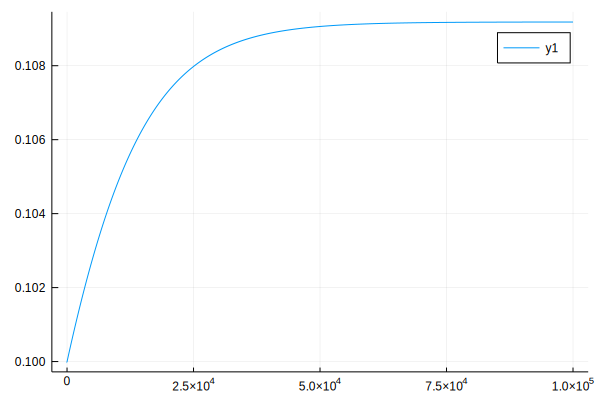

In [384]:
plot(s_list)

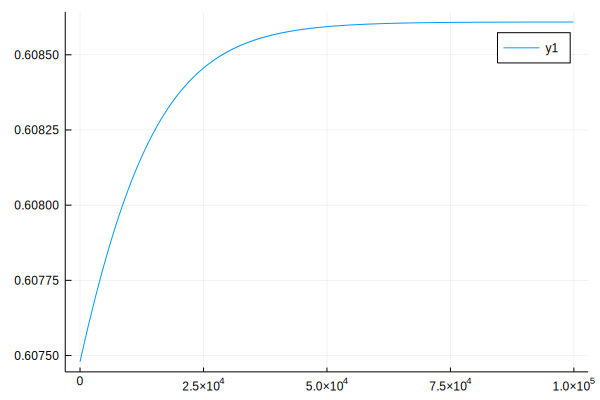

In [385]:
#plot(A_list)
plot(B_list[100:end])
#plot!(ylims=(0.55,0.65))

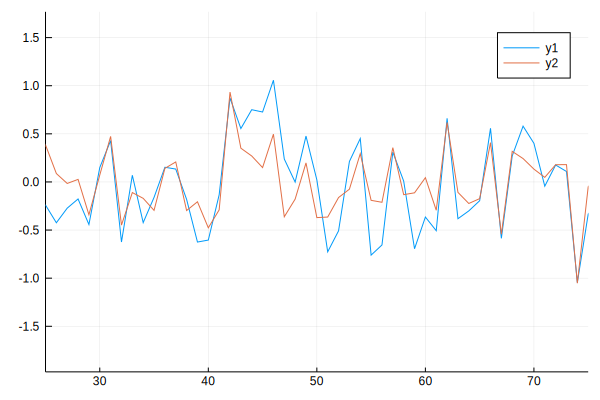

In [66]:
plot(data.-ou_data)
plot!(data.-mu_px)
plot!(xlims=(25,75))

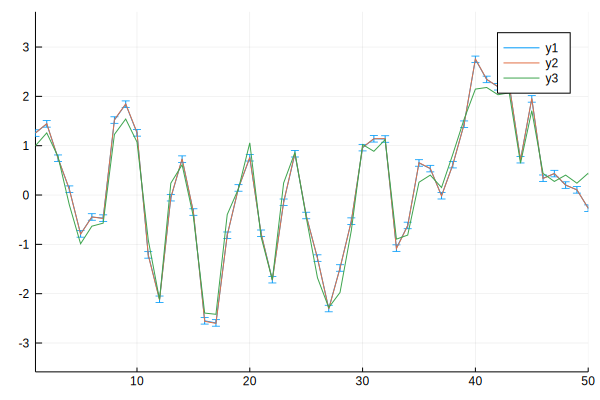

In [244]:
plot(mu_px,yerror=sig_px)
plot!(data)
plot!(ou_data)
plot!(xlims=(1,50))

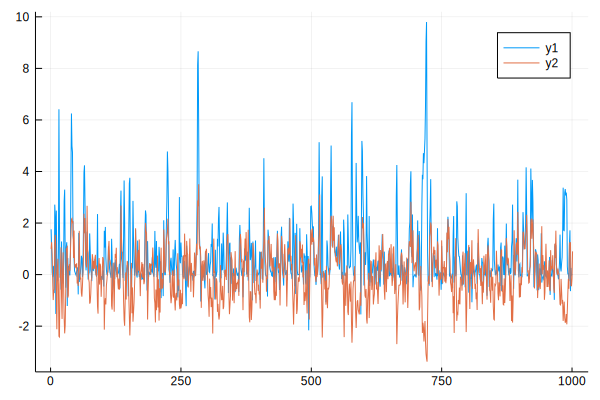

In [245]:
plot(exxpone)
plot!(ou_data)
#plot!(xlims=(1,50))
#print(sum(exxpone))

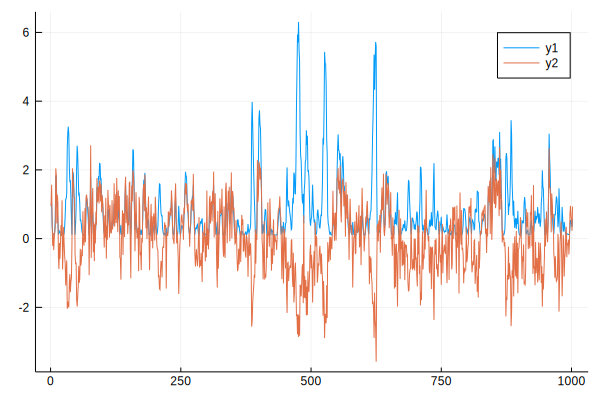

In [69]:
plot(exsq)
plot!(data)

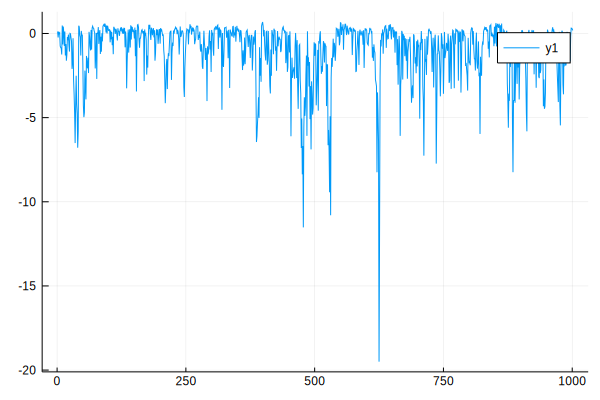

In [70]:
plot(exxxpone)

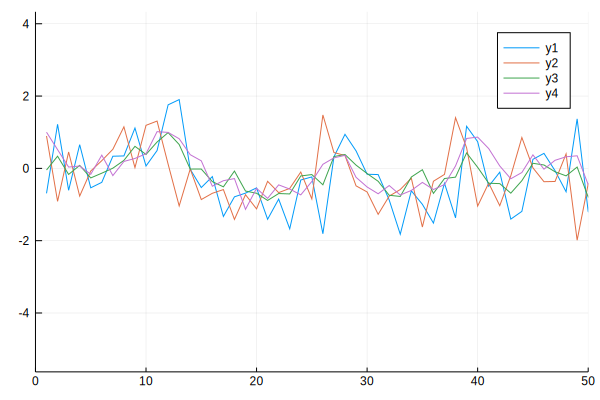

In [182]:
plot(mu_x)
plot!(mu_xpone)
plot!(mu_px)
plot!(ou_data)
plot!(xlims=(0,50))

In [86]:
sigmaNnew = sqrt(1/length(data)*sum(sig_px.^2+mu_px.^2+data.^2-2*mu_px.*data))

0.5436205352210381